# Import Libaries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load Data

In [52]:
data = pd.read_csv('FlightPrice_Dataset.csv')
data.head(20)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


# Data Discreption


The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it.
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines. 
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature. 
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities. 
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels. 
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities. 
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time. 
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities. 
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy. 
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours. 
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date. 
11) Price: Target variable stores information of the ticket price.

# Data Exploration and Feature Analysis

In [53]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


**The average duration of flights in the dataset is 11.2 and the maximum duration is 49.8 and the minimum duration is 0.8.
The average days left of flights in the dataset is 26 and the maximum days left are 49 and the minimum days left are 1.
The average price of flights in the dataset is 7425 and the maximum price are 123071 and the minimum price are 1105.**

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


 **we have 300153 features, we don't have missing values. data types are int or object.**

In [55]:
# drop the unnecessary column
data.drop("Unnamed: 0", axis=1, inplace=True )

In [8]:
# print the all unique values from each column, in order to make it easier to visualize the relation between features and the target value.

unique_value_airline = data['airline'].unique()
unique_value_flight = data['flight'].unique()
unique_value_source_city = data['source_city'].unique()
unique_value_departure_time = data['departure_time'].unique()
unique_value_stops = data['stops'].unique()
unique_value_arrival_time = data['arrival_time'].unique()
unique_value_destination_city = data['destination_city'].unique()
unique_value_class = data['class'].unique()

print(f"unique_values of airline: {unique_value_airline}")
print(f"unique_values of flight: {unique_value_flight}")
print(f"unique_values of source_city: {unique_value_source_city}")
print(f"unique_values of departure_time: {unique_value_departure_time}")
print(f"unique_values of stops: {unique_value_stops}")
print(f"unique_values of arrival_time: {unique_value_arrival_time}")
print(f"unique_values of destination_city: {unique_value_destination_city}")
print(f"unique_values of class: {unique_value_class}")


unique_values of airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
unique_values of flight: ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
unique_values of source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
unique_values of departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
unique_values of stops: ['zero' 'one' 'two_or_more']
unique_values of arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
unique_values of destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
unique_values of class: ['Economy' 'Business']


**After we get all unique category in each column, we will visualize the relation beween price by each category and class.**

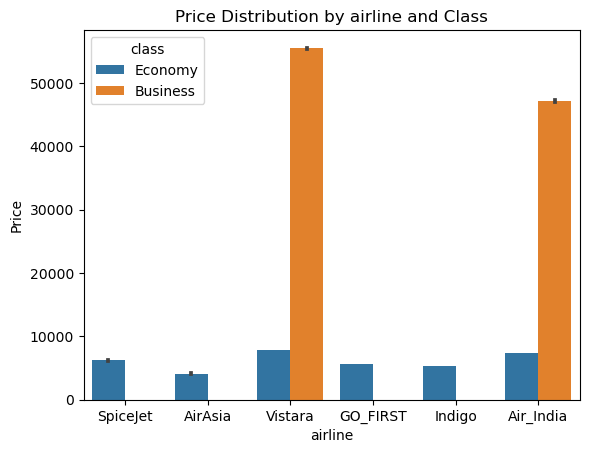

In [56]:
# visualize Price Distribution by airline and Class.

selected_airlines = ['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo', 'Air_India']
subset_data = data[data['airline'].isin(selected_airlines)]

sns.barplot(x='airline', y='price', hue='class', data=subset_data)
plt.title('Price Distribution by airline and Class')
plt.xlabel('airline')
plt.ylabel('Price')
plt.show()


**Busines class has really high ticket price compare with economy class. just "Vistara" and "Air_india" have busines class. 
economy class ticket price is always under 10000.**


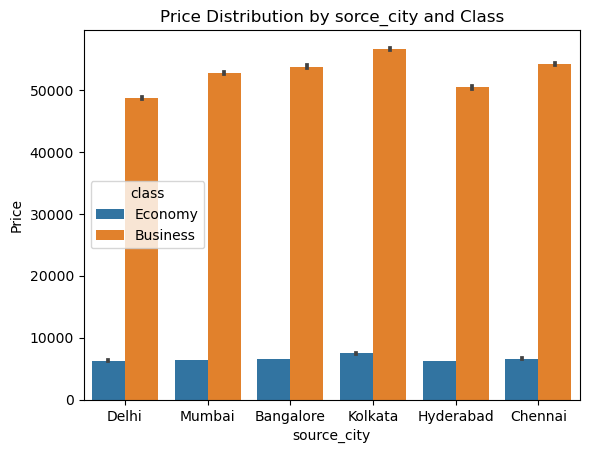

In [57]:
# visualize Price Distribution by sorce_city and Class.

selected_source_city = ['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai']
subset_data = data[data['source_city'].isin(selected_source_city)]

sns.barplot(x='source_city', y='price', hue='class', data=subset_data)
plt.title('Price Distribution by sorce_city and Class')
plt.xlabel('source_city')
plt.ylabel('Price')
plt.show()


**source_city play not very significant rol to determine ticket price. any way 
we can see that departure from Kolkata has slightly higher ticket price than other cities, 
and departure from Hyderabad is slightly cheaper , if you by a business class ticket.**

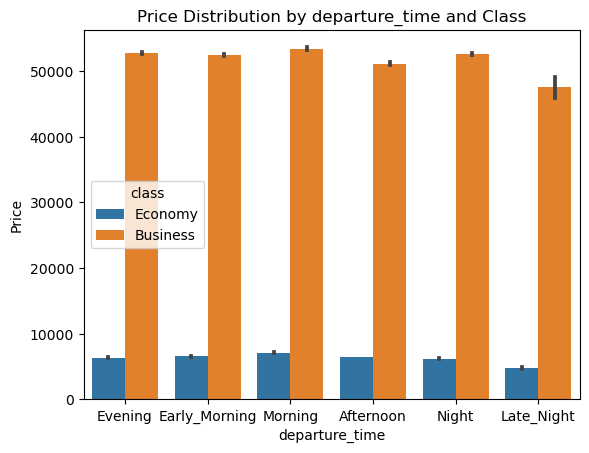

In [58]:
# visualize Price Distribution by departure_time and Class.

selected_departure_time = ['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night', 'Late_Night']
subset_data = data[data['departure_time'].isin(selected_departure_time)]

sns.barplot(x='departure_time', y='price', hue='class', data=subset_data)
plt.title('Price Distribution by departure_time and Class')
plt.xlabel('departure_time')
plt.ylabel('Price')
plt.show()

**The ticket price for late-night departure times is slightly cheaper than others. However, generally, the departure time is not a very important determinant of ticket prices.**

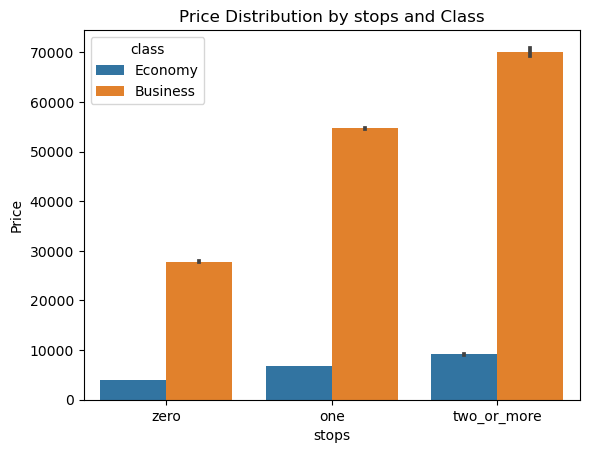

In [59]:
# visualize Price Distribution by stops and Class.

selected_stops = ['zero', 'one', 'two_or_more']
subset_data = data[data['stops'].isin(selected_stops)]

sns.barplot(x='stops', y='price', hue='class', data=subset_data)
plt.title('Price Distribution by stops and Class')
plt.xlabel('stops')
plt.ylabel('Price')
plt.show()

**It is really interesting to see that tickets with two or more stops have higher prices. 'Stops' is a significant factor in determining ticket prices.**

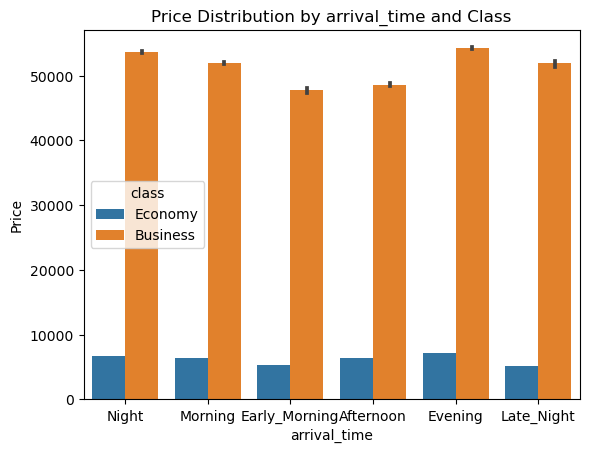

In [60]:
# visualize Price Distribution by arrival_time and Class.

selected_arrival_time = ['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening', 'Late_Night']
subset_data = data[data['arrival_time'].isin(selected_arrival_time)]

sns.barplot(x='arrival_time', y='price', hue='class', data=subset_data)
plt.title('Price Distribution by arrival_time and Class')
plt.xlabel('arrival_time')
plt.ylabel('Price')
plt.show()

**The arrival_time has'nt big effect on ticket price. Anyway, if you buy business class ticket, and choese early morning or afternoon arrival time, the price is littele bit cheaper.**

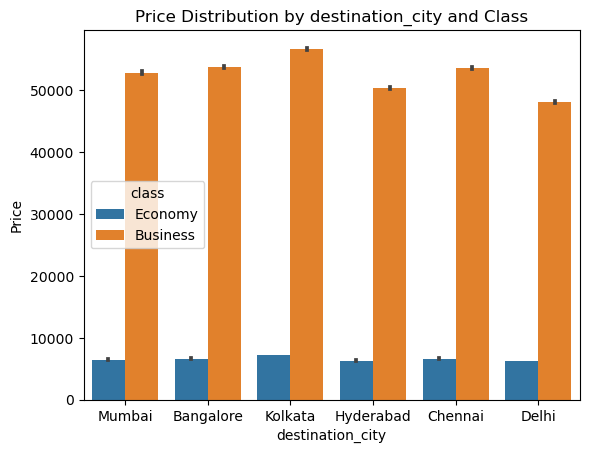

In [61]:
# visualize Price Distribution by destination_city and Class.

selected_destination_city = ['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi']
subset_data = data[data['destination_city'].isin(selected_destination_city)]

sns.barplot(x='destination_city', y='price', hue='class', data=subset_data)
plt.title('Price Distribution by destination_city and Class')
plt.xlabel('destination_city')
plt.ylabel('Price')
plt.show()

**If the destination city is 'Kolkata,' the ticket price is slightly higher than for other cities. If the destination cities are 'Hyderabad' and 'Delhi,' the ticket prices are a little bit cheaper than for other cities. However, generally, the destination city has a small effect on ticket prices.**

In [62]:
count_unique_value_flight = len(data['flight'].unique())
print(count_unique_value_flight)


1561


**We can observe that the 'flight' column has a large number of unique values, making it inconvenient to visualize directly. For this reason, we plan to visualize the relationship between price and each flight type differently. We will begin by visualizing a subset of the entire flight types in the first subplot and continue with the second subset in the second subplot, and so forth.**

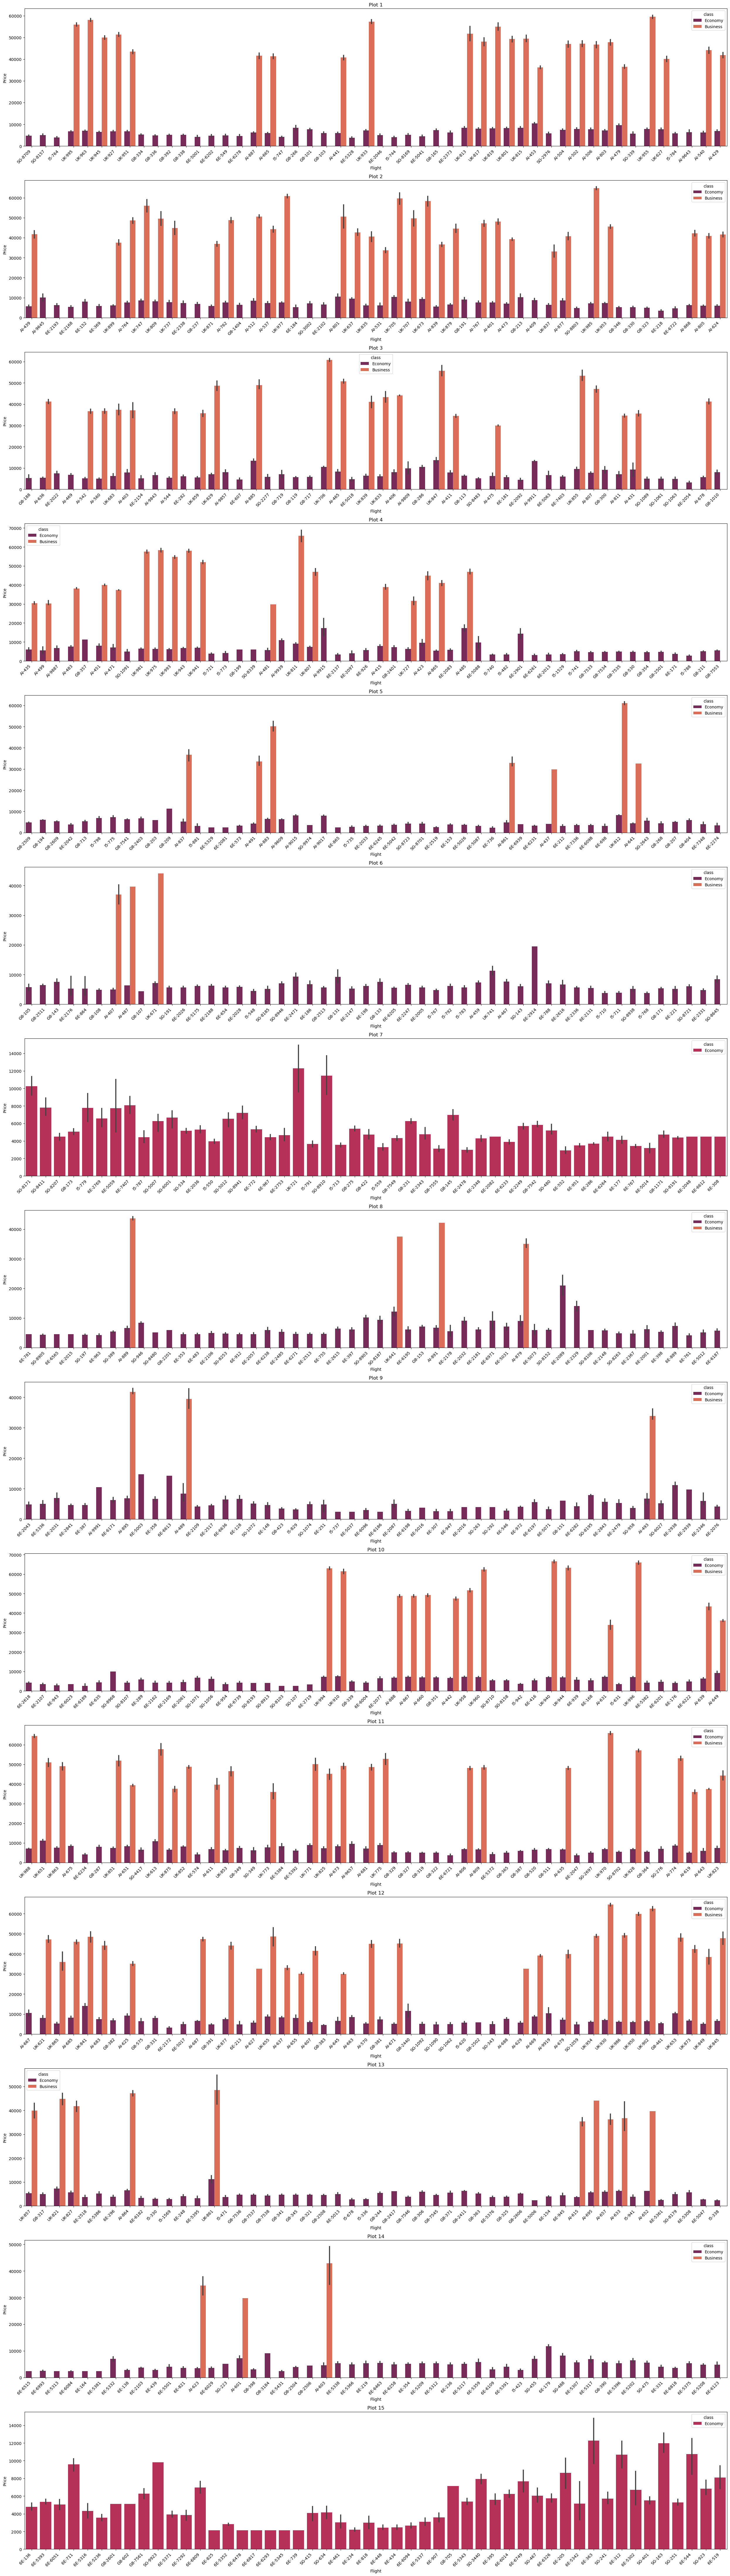

In [63]:

# Determine the number of plots and unique flight values
num_plots = 15
unique_flights = data['flight'].unique()
total_flights = len(unique_flights)

# Set the figure size
plt.figure(figsize=(25, 88))

# Loop through each subplot
for i in range(num_plots):
    # Determine the range of flights for the current subplot
    start_idx = i * 50
    end_idx = min((i + 1) * 50, total_flights)
    
    # Sample flights within the current range
    sampled_flights = unique_flights[start_idx:end_idx]
    subset_data = data[data['flight'].isin(sampled_flights)]
    
    # Create a subplot
    plt.subplot(15, 1, i+1)  # 15 rows, 1 columns for a total of 15 subplots
    
    # Scatter plot for the subset of flights
    sns.barplot(x='flight', y='price', hue='class', palette='rocket', data=subset_data)
    
    plt.title(f'Plot {i+1}')
    plt.xlabel('Flight')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

**we can see that mostly 'UK', 'AI','SG' flight types have high ticket prices. '6E' flight type has mostly cheaper ticket price.**

In [64]:
# to ensure what we have seen in periosu plots, we wil count how many high priced ticket in selected flight type.

# Define the flight types
uk_flights = data[data['flight'].str.startswith('UK')]
ai_flights = data[data['flight'].str.startswith('AI')]
sixE_flights = data[data['flight'].str.startswith('6E')]

# Filter based on the price condition
uk_high_price_count = uk_flights[uk_flights['price'] > 6000].shape[0]
ai_high_price_count = ai_flights[ai_flights['price'] > 6000].shape[0]
sixE_low_price_count = sixE_flights[sixE_flights['price'] < 4000].shape[0]

# Print the results
print(f"Number of 'UK...' flights with price > 6000: {uk_high_price_count}")
print(f"Number of 'AI...' flights with price > 6000: {ai_high_price_count}")
print(f"Number of '6E...' flights with price < 4000: {sixE_low_price_count}")


Number of 'UK...' flights with price > 6000: 102002
Number of 'AI...' flights with price > 6000: 57472
Number of '6E...' flights with price < 4000: 17201


**Among all ticket prices with different flight types, 50% of the flights with 'UK...' and 'AI...' flight types have ticket prices higher than 6000.** 

# Feature engeneering

In [65]:
data_types = data.dtypes
print(data_types)

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


**we have several object data type, to insure the train model process run succesfully, we will encode the the object data types.**

In [66]:
# Encode categorical variables using label encoding

label_encoder = LabelEncoder()
data['airline'] = label_encoder.fit_transform(data['airline'])
data['flight'] = label_encoder.fit_transform(data['flight'])
data['source_city'] = label_encoder.fit_transform(data['source_city'])
data['departure_time'] = label_encoder.fit_transform(data['departure_time'])
data['stops'] = label_encoder.fit_transform(data['stops'])
data['arrival_time'] = label_encoder.fit_transform(data['arrival_time'])
data['destination_city'] = label_encoder.fit_transform(data['destination_city'])
data['class'] = label_encoder.fit_transform(data['class'])

# Perform one-hot encoding for categorical columns
data = pd.get_dummies(data, columns=['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'])



In [67]:
data.head(20)

,duration,days_left,price,airline_0,airline_1,airline_2,airline_3,airline_4,airline_5,flight_0,...,arrival_time_4,arrival_time_5,destination_city_0,destination_city_1,destination_city_2,destination_city_3,destination_city_4,destination_city_5,class_0,class_1
0,2.17,1,5953,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,True
1,2.33,1,5953,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
2,2.17,1,5956,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2.25,1,5955,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
4,2.33,1,5955,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,True
5,2.33,1,5955,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
6,2.08,1,6060,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,True
7,2.17,1,6060,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
8,2.17,1,5954,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
9,2.25,1,5954,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Columns: 1599 entries, duration to class_1
dtypes: bool(1596), float64(1), int64(2)
memory usage: 463.7 MB


In [69]:
# Display the range of values in each column
feature_ranges = data.apply(lambda x: np.logical_xor(x.max(), x.min()) if x.dtype == 'bool' else x.max() - x.min())

# Display the results
print("Range of values in each column:")
print(feature_ranges)


Range of values in each column:
duration                49.0
days_left                 48
price                 121966
airline_0               True
airline_1               True
                       ...  
destination_city_3      True
destination_city_4      True
destination_city_5      True
class_0                 True
class_1                 True
Length: 1599, dtype: object


**The maximun value is: 121966, The minimum value is : 48. There is big difference between range of different features, we need to scale data.first we define x_train and y_train, split data to train, cv, test sets, then we will scale the data.**

In [70]:
# Because of the less memory capacity of my computer, 
# I will take the sampel of the data to train model.

sample_size = 10000  
sampled_data = data.sample(n=sample_size, random_state=42)


In [71]:
# Define x_train and y_train

y = sampled_data['price']
X = sampled_data.drop(['price'], axis=1)


In [72]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
[[type(i),i.shape] for i in [X_train, X_test, y_train, y_test]]

[[pandas.core.frame.DataFrame, (8000, 1598)],
 [pandas.core.frame.DataFrame, (2000, 1598)],
 [pandas.core.series.Series, (8000,)],
 [pandas.core.series.Series, (2000,)]]

In [74]:
# Feature Scaling using Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y to be numpy array to be consistent with X
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Train and evaluate model 

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers

In [77]:
# Defining the baseline deep learning model
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))  
 

    # Compiling the model
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


In [78]:
model = build_model()
# Fitting the model on the training data
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.4,
                    verbose=0)


In [79]:
# Plotting the training and validation loss
def plot_metric():
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['root_mean_squared_error'], label='Train Metric')
    plt.plot(history.history['val_root_mean_squared_error'], label='Validation Metric')
    plt.title('Model Learning Curve')
    plt.ylabel('Metric')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

In [80]:
from keras.callbacks import TensorBoard
import datetime

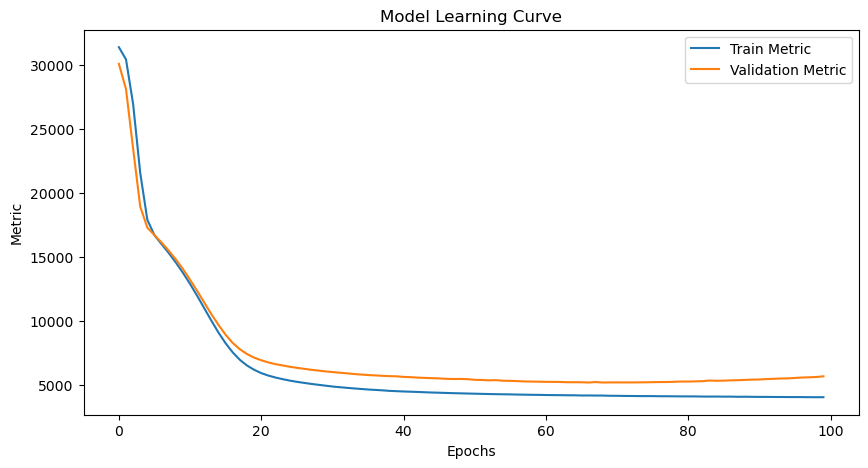

In [81]:
plot_metric()

**During the visualization of errors, the line sharply decreases, then becomes flat, 
but the sharp downward part of the line is not smooth and changes its direction slightly. 
it refers may be there is variations in the data, such as outliers, or fluctuations in the training.**

In [83]:
tensorboard_callback = TensorBoard(log_dir=log_dir, update_freq='epoch')

NameError: name 'log_dir' is not defined

In [84]:
model = build_model()
log_dir = "log/fit/0_initial_model"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Use this callback during model training
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    validation_split=0.4,
                    verbose=0,
                    callbacks=[tensorboard_callback])

**It seems we could have stopped around 40 epochs, as after that point, the error is not dropping significantly. 
We can use Early Stopping.**

In [85]:
from keras.callbacks import EarlyStopping

In [86]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='root_mean_squared_error', 
                               patience=20, 
                               min_delta=40, 
                               mode='min', 
                               )

In [87]:
model = build_model()
# Create a TensorBoard callback
log_dir = "log-reference/fit-2/0_epoch100_ES_model"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Use this callback during model training
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    validation_split=0.4,
                    verbose=0,
                    callbacks=[tensorboard_callback,early_stopping])

**Now, our model can generelize from 5000, is this price higher than SD y_train? 
we will check it.**

In [88]:
import json

In [89]:
# Calculate the standard deviation of y_train
std_dev_y_train = np.std(y_train)

# A dictionary to store all models metrics
all_model_metrics = {'SD y_train':std_dev_y_train}

with open("all_model_metrics-reference.json", "w") as f:
    json.dump(all_model_metrics, f)

In [90]:
def calculate_rmse(predictions, targets):
    """Calculate the Root Mean Squared Error."""
    return np.sqrt(np.mean((predictions - targets) ** 2))

def evaluate_and_plot_model(model_name, model, history):
    """Evaluate the model and plot metrics."""
    
    # Extract the last training and validation metric results
    last_train_rmse = history.history['root_mean_squared_error'][-1]
    last_val_rmse = history.history['val_root_mean_squared_error'][-1]

    # Make predictions on the test set
    test_predictions = model.predict(X_test_scaled).reshape(-1)

    # Calculate RMSE of the test set
    test_rmse = calculate_rmse(test_predictions, y_test)

   # Open the file for reading
    with open("all_model_metrics-reference.json", "r") as f:
    # Load the dictionary from the file
       all_model_metrics = json.load(f)

    # Store metrics for the current model
    all_model_metrics[f'{model_name} trained'] = float(last_train_rmse) if isinstance(last_train_rmse, (float, int)) else last_train_rmse
    all_model_metrics[f'{model_name} validated'] = float(last_val_rmse) if isinstance(last_val_rmse, (float, int)) else last_val_rmse
    all_model_metrics[f'{model_name} test'] = float(test_rmse) if isinstance(test_rmse, (float, int)) else test_rmse
    all_model_metrics['SD y_train'] = float(std_dev_y_train) if isinstance(std_dev_y_train, (float, int)) else std_dev_y_train

    # Dump to a file for future use
    with open("all_model_metrics-reference.json", "w") as f:
      json.dump(all_model_metrics, f)

    # Plot metrics for all models
    plt.figure(figsize=(16,6))

    # Separate keys and values from the dictionary
    keys = list(all_model_metrics.keys())
    values = [value[0] if isinstance(value, tuple) else value for value in all_model_metrics.values()]

    # Plotting
    plt.bar(keys, values)

    plt.ylabel('Dollars')
    plt.title('Model Performance Metrics: RMSE')
    plt.xticks(rotation=45)
    plt.show()


63/63 [==============================] - 0s 1ms/step


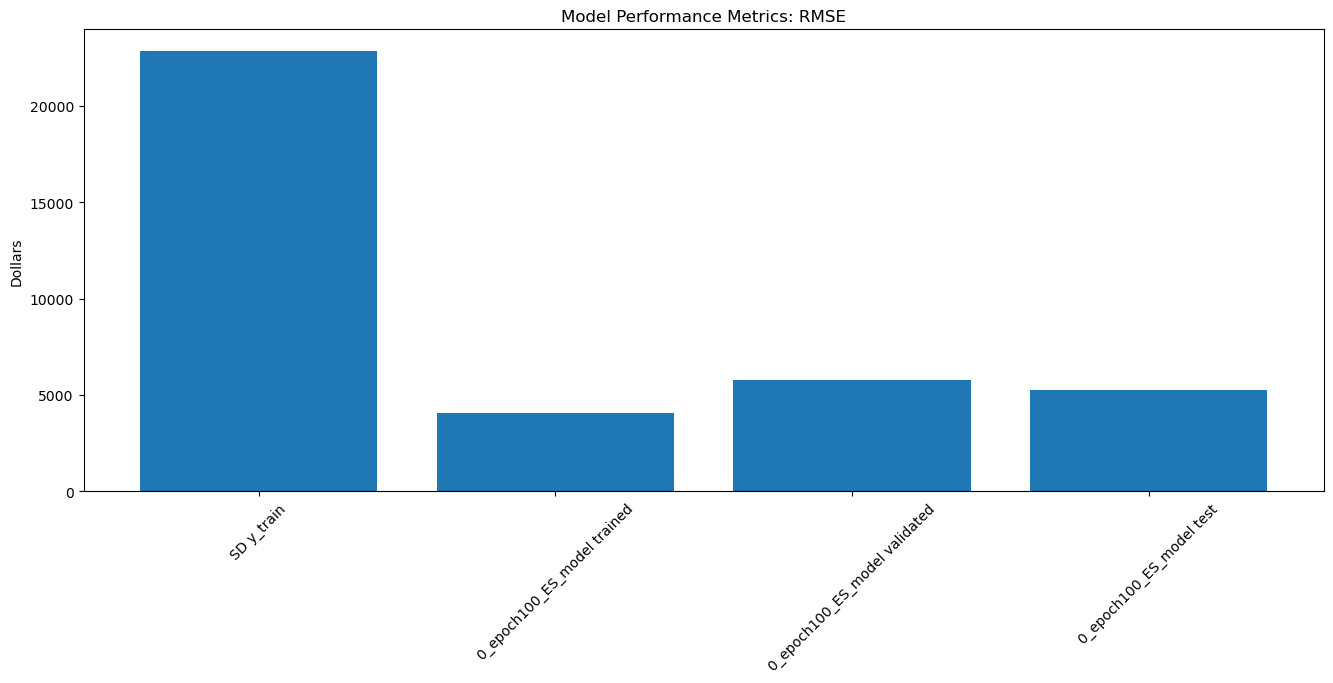

In [91]:
evaluate_and_plot_model('0_epoch100_ES_model', model, history)


In [92]:
print(all_model_metrics)

{'SD y_train': 22824.738786361788}


**SD y_train is higher than min price wich our model can generelize, now, we will see the curve fitting in different polynomial degrees and r2 score.**

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [94]:
from sklearn.metrics import r2_score

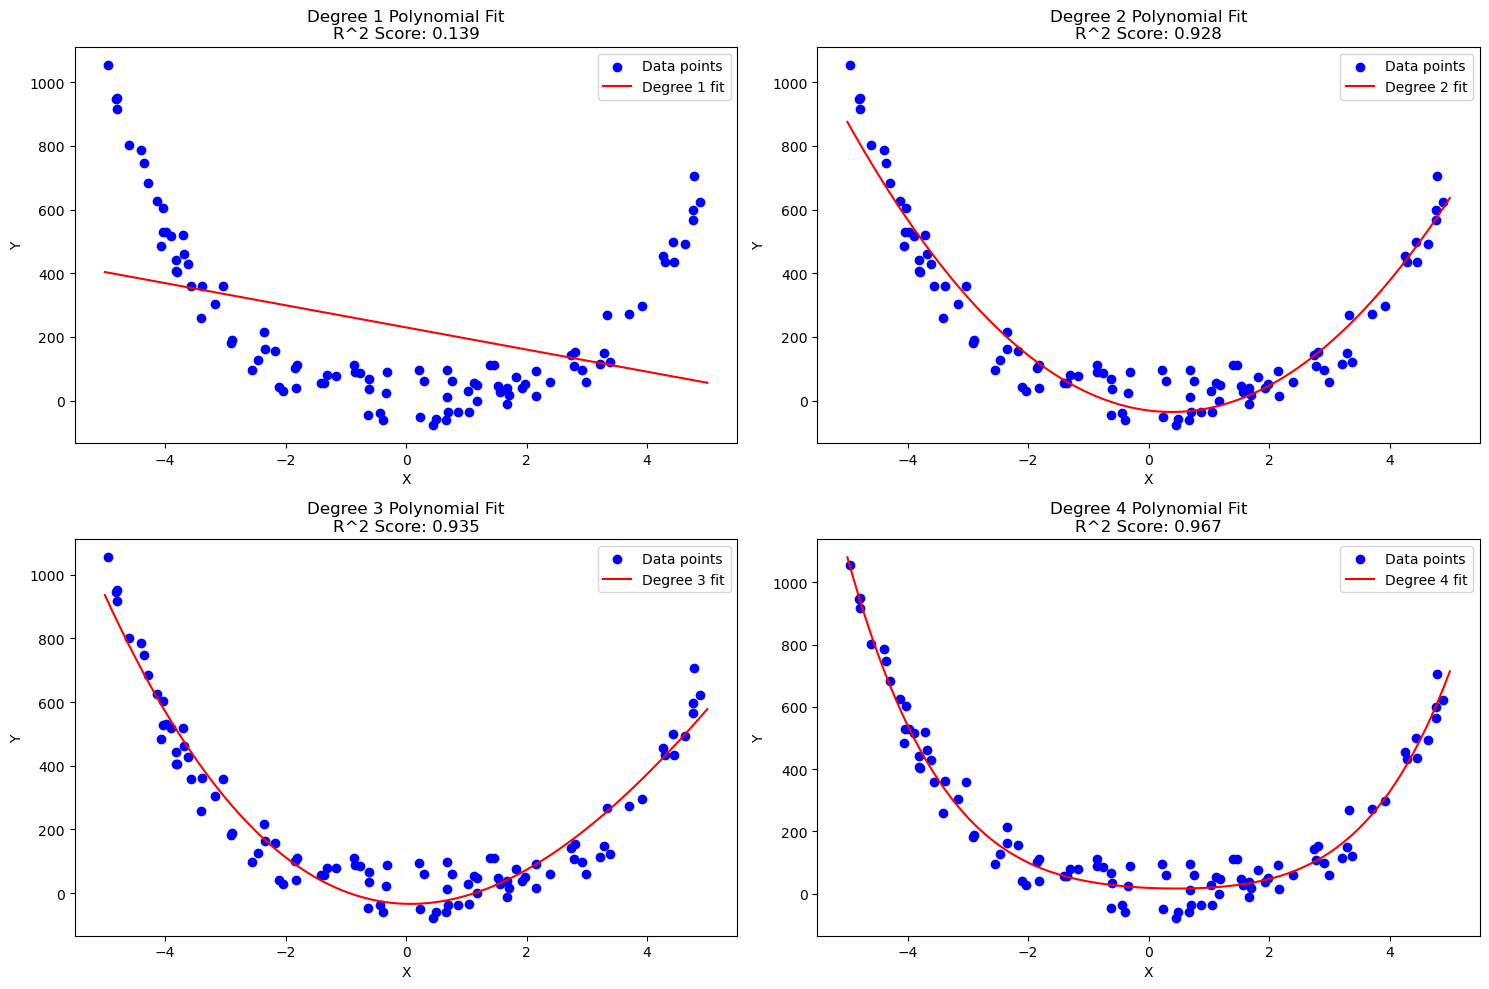

In [95]:
# Degrees of polynomial for curve fitting
degrees = [1, 2, 3, 4]

# Generating new quartic data with less noise and distinct quartic characteristics
np.random.seed(0)
x = np.random.rand(100, 1) * 10 - 5  # Random values for x in the range [0, 10]
y = x**4 - 1.25 * x**3 + 11 * x**2 - 6 * x + 0.25 + np.random.randn(100, 1) * 50  # Quartic relationship with less noise

# Preparing data for polynomial regression
x_plot = np.linspace(-5, 5, 100).reshape(-1, 1)

# R^2 scores for each model
r2_scores_new = []

# Plotting the curves
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # Transforming data for polynomial regression
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)
    x_plot_poly = poly_features.transform(x_plot)

    # Polynomial regression
    model_linear = LinearRegression()
    model_linear.fit(x_poly, y)
    y_plot = model_linear.predict(x_plot_poly)

    # Calculating R^2 score
    y_pred = model_linear.predict(x_poly)
    r2_score_value = r2_score(y, y_pred)
    r2_scores_new.append(r2_score_value)

    # Plotting
    plt.subplot(2, 2, i + 1)
    plt.scatter(x, y, color='blue', label="Data points")
    plt.plot(x_plot, y_plot, color='red', label=f'Degree {degree} fit')
    plt.title(f'Degree {degree} Polynomial Fit\nR^2 Score: {r2_score_value:.3f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

plt.tight_layout()
plt.show()


In [96]:
test_predictions = model.predict(X_test_scaled).reshape(-1)
r2_xgb = r2_score(y_test,test_predictions)
print(r2_xgb)

63/63 [==============================] - 0s 1ms/step
0.9483436580027811


**The r2 score is 0.948**

**We achieved a good accuracy result with our current model, but we will strive to further improve its performance.**

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers

In [102]:
#we will try further improve our model by adjusting the layers en neurons.


# Defining the baseline deep learning model
def build_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))  
 

    # Compiling the model
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [103]:
model = build_model()
# Fitting the model on the training data
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.4,
                    verbose=0)

In [104]:
# Plotting the training and validation loss
def plot_metric():
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['root_mean_squared_error'], label='Train Metric')
    plt.plot(history.history['val_root_mean_squared_error'], label='Validation Metric')
    plt.title('Model Learning Curve')
    plt.ylabel('Metric')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

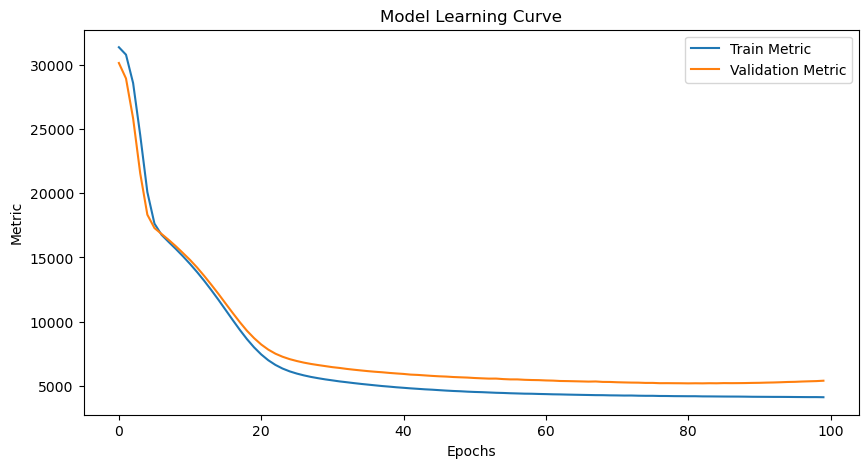

In [105]:
plot_metric()

In [ ]:
from keras.callbacks import EarlyStopping

In [127]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='root_mean_squared_error', 
                               patience=20, 
                               min_delta=40, 
                               mode='min', 
                               )

In [128]:
model = build_model()
# Create a TensorBoard callback
log_dir = "log-reference/fit-2/0_epoch100_ES_model"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Use this callback during model training
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    validation_split=0.4,
                    verbose=0,
                    callbacks=[tensorboard_callback,early_stopping])

In [129]:
import json

In [130]:
# Calculate the standard deviation of y_train
std_dev_y_train = np.std(y_train)

# A dictionary to store all models metrics
all_model_metrics = {'SD y_train':std_dev_y_train}

with open("all_model_metrics-reference.json", "w") as f:
    json.dump(all_model_metrics, f)

In [131]:
def calculate_rmse(predictions, targets):
    """Calculate the Root Mean Squared Error."""
    return np.sqrt(np.mean((predictions - targets) ** 2))

def evaluate_and_plot_model(model_name, model, history):
    """Evaluate the model and plot metrics."""
    
    # Extract the last training and validation metric results
    last_train_rmse = history.history['root_mean_squared_error'][-1]
    last_val_rmse = history.history['val_root_mean_squared_error'][-1]

    # Make predictions on the test set
    test_predictions = model.predict(X_test_scaled).reshape(-1)

    # Calculate RMSE of the test set
    test_rmse = calculate_rmse(test_predictions, y_test)

   # Open the file for reading
    with open("all_model_metrics-reference.json", "r") as f:
    # Load the dictionary from the file
       all_model_metrics = json.load(f)

    # Store metrics for the current model
    all_model_metrics[f'{model_name} trained'] = float(last_train_rmse) if isinstance(last_train_rmse, (float, int)) else last_train_rmse
    all_model_metrics[f'{model_name} validated'] = float(last_val_rmse) if isinstance(last_val_rmse, (float, int)) else last_val_rmse
    all_model_metrics[f'{model_name} test'] = float(test_rmse) if isinstance(test_rmse, (float, int)) else test_rmse
    all_model_metrics['SD y_train'] = float(std_dev_y_train) if isinstance(std_dev_y_train, (float, int)) else std_dev_y_train

    # Dump to a file for future use
    with open("all_model_metrics-reference.json", "w") as f:
      json.dump(all_model_metrics, f)

    # Plot metrics for all models
    plt.figure(figsize=(16,6))

    # Separate keys and values from the dictionary
    keys = list(all_model_metrics.keys())
    values = [value[0] if isinstance(value, tuple) else value for value in all_model_metrics.values()]

    # Plotting
    plt.bar(keys, values)

    plt.ylabel('Dollars')
    plt.title('Model Performance Metrics: RMSE')
    plt.xticks(rotation=45)
    plt.show()


63/63 [==============================] - 0s 1ms/step


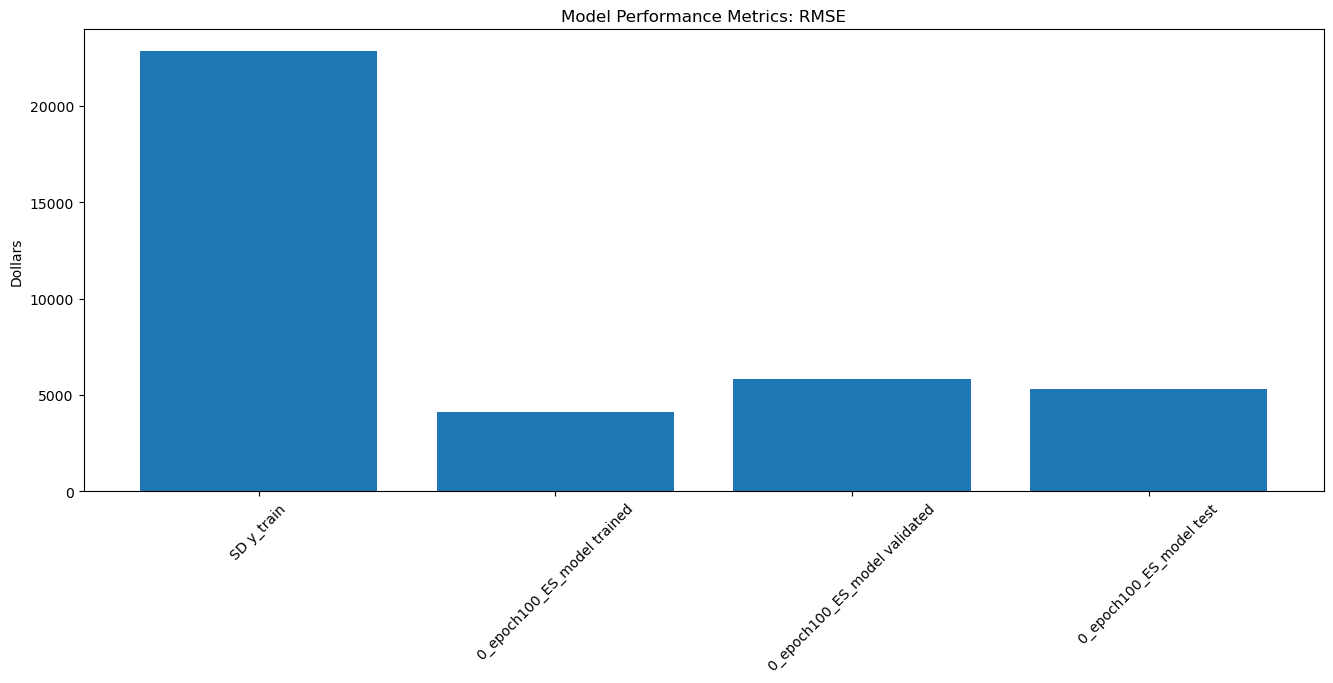

In [132]:
evaluate_and_plot_model('0_epoch100_ES_model', model, history)

In [133]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [134]:
from sklearn.metrics import r2_score

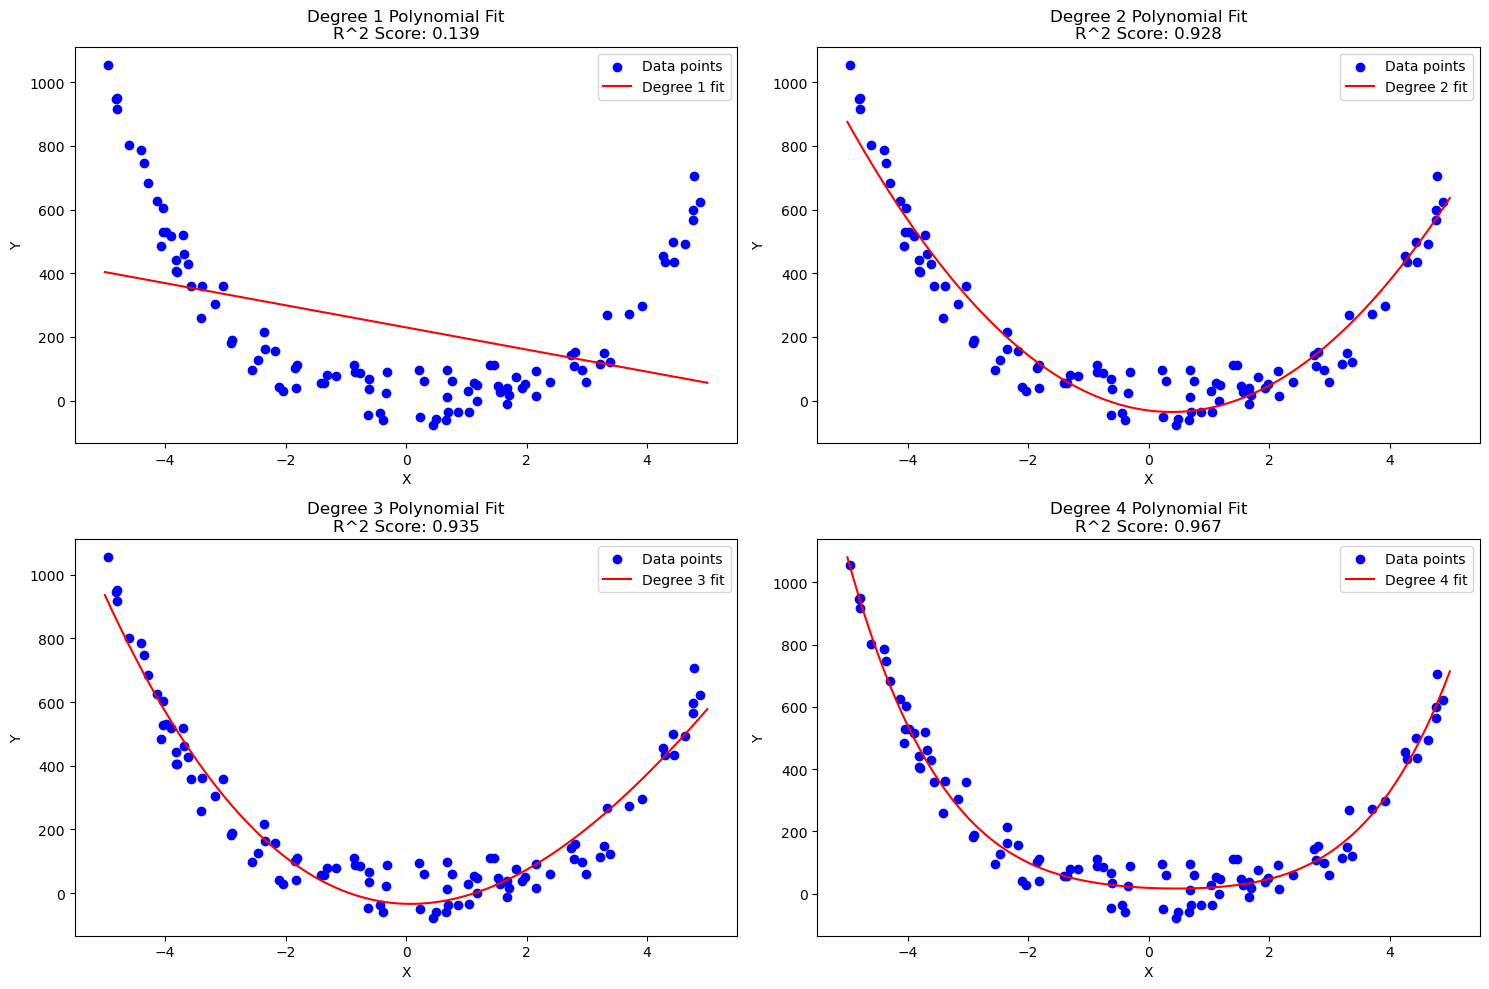

In [135]:
# Degrees of polynomial for curve fitting
degrees = [1, 2, 3, 4]

# Generating new quartic data with less noise and distinct quartic characteristics
np.random.seed(0)
x = np.random.rand(100, 1) * 10 - 5  # Random values for x in the range [0, 10]
y = x**4 - 1.25 * x**3 + 11 * x**2 - 6 * x + 0.25 + np.random.randn(100, 1) * 50  # Quartic relationship with less noise

# Preparing data for polynomial regression
x_plot = np.linspace(-5, 5, 100).reshape(-1, 1)

# R^2 scores for each model
r2_scores_new = []

# Plotting the curves
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # Transforming data for polynomial regression
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)
    x_plot_poly = poly_features.transform(x_plot)

    # Polynomial regression
    model_linear = LinearRegression()
    model_linear.fit(x_poly, y)
    y_plot = model_linear.predict(x_plot_poly)

    # Calculating R^2 score
    y_pred = model_linear.predict(x_poly)
    r2_score_value = r2_score(y, y_pred)
    r2_scores_new.append(r2_score_value)

    # Plotting
    plt.subplot(2, 2, i + 1)
    plt.scatter(x, y, color='blue', label="Data points")
    plt.plot(x_plot, y_plot, color='red', label=f'Degree {degree} fit')
    plt.title(f'Degree {degree} Polynomial Fit\nR^2 Score: {r2_score_value:.3f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

plt.tight_layout()
plt.show()


In [136]:
test_predictions = model.predict(X_test_scaled).reshape(-1)
r2_xgb = r2_score(y_test,test_predictions)
print(r2_xgb)

63/63 [==============================] - 0s 982us/step
0.9475858966335531


**We achieved a slightly better accuracy with the second model, which is 0.9531.**